In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import load_model


from sklearn.metrics import precision_recall_curve
from src.modeling_functions import get_results,plot_roc_curve,plot_shap,fit_and_get_neural_network_model

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load an scale the data
data = pd.read_csv("../Data/Telco-Customer-Churn-Encoded.csv")
data = data.drop(columns = ['PhoneService','gender'])
X = data.drop(columns = 'Churn')
y = data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [3]:
# Fit the model
fit_and_get_neural_network_model(X_train,y_train,epochs=100, batch_size=32, patience=10, save_model=False)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.4358 - loss: 3.8407 - val_f1_score: 0.5164 - val_loss: 0.5368 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4748 - loss: 2.0350 - val_f1_score: 0.4523 - val_loss: 0.4325 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4547 - loss: 1.3977 - val_f1_score: 0.4295 - val_loss: 0.4804 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4409 - loss: 1.1950 - val_f1_score: 0.4278 - val_loss: 0.4551 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4400 - loss: 1.1228 - val_f1_score: 0.4312 - val_loss: 0.4471 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4196 - loss: 1.1635 - val_f1_score: 0.4278 - val_loss: 0.4541 - learning_rate: 0.0010
Epoch 7/100
 92/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4345 - loss: 1.

(<Sequential name=sequential, built=True>,
 <keras.src.callbacks.history.History at 0x1cc1257e5a0>)

In [4]:
# Load the model and make predictions
model_nn = load_model(f"../models/NeuralNetwork_Churn.h5")

y_pred_proba = model_nn.predict(X_test)
y_pred = (y_pred_proba>=0.5).astype(int)

y_pred_proba_train = model_nn.predict(X_train)
y_pred_train = (y_pred_proba_train>=0.5).astype(int)


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred = (y_pred_proba >= best_threshold).astype(int)




66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


Metrics for test and train
Metrics for test
Accuracy: 0.7749
Precision: 0.5569
Recall: 0.7504
F1: 0.6393

Metrics for train
Accuracy: 0.7991
Precision: 0.7225
Recall: 0.3960
F1: 0.5116

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1549
           1       0.56      0.75      0.64       561

    accuracy                           0.77      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.81      0.77      0.78      2110



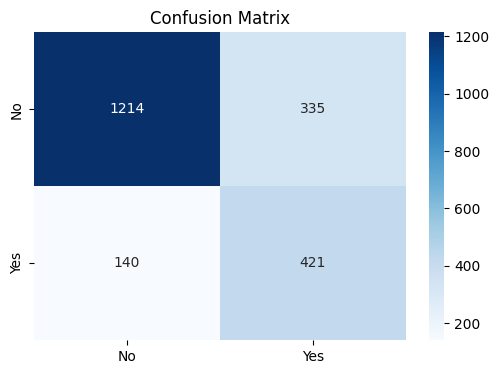

In [5]:
# Get metric results
get_results(y_test,y_pred,y_train,y_pred_train)

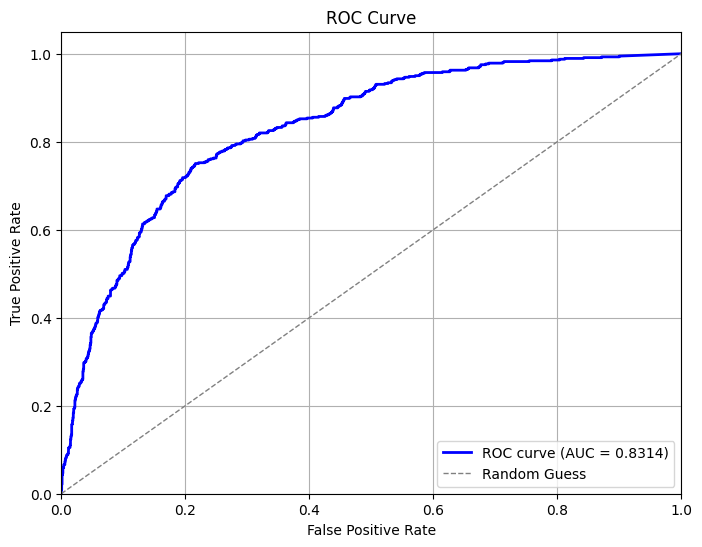

AUC: 0.8314


In [6]:
# Plot ROC curve
plot_roc_curve(model=model_nn,X_test=X_test,y_test=y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


  2%|▏         | 1/50 [00:00<00:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


  4%|▍         | 2/50 [00:00<00:11,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


  6%|▌         | 3/50 [00:00<00:10,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


  8%|▊         | 4/50 [00:00<00:10,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


 10%|█         | 5/50 [00:01<00:10,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


 12%|█▏        | 6/50 [00:01<00:09,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 14%|█▍        | 7/50 [00:01<00:09,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


 16%|█▌        | 8/50 [00:01<00:10,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


 18%|█▊        | 9/50 [00:02<00:11,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 20%|██        | 10/50 [00:02<00:13,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 22%|██▏       | 11/50 [00:03<00:14,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


 24%|██▍       | 12/50 [00:03<00:14,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 26%|██▌       | 13/50 [00:03<00:14,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


 28%|██▊       | 14/50 [00:04<00:14,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 30%|███       | 15/50 [00:04<00:13,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


 32%|███▏      | 16/50 [00:05<00:13,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


 34%|███▍      | 17/50 [00:05<00:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 36%|███▌      | 18/50 [00:07<00:21,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 38%|███▊      | 19/50 [00:07<00:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 40%|████      | 20/50 [00:08<00:23,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 42%|████▏     | 21/50 [00:09<00:25,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 44%|████▍     | 22/50 [00:10<00:25,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


 46%|████▌     | 23/50 [00:11<00:25,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 48%|████▊     | 24/50 [00:12<00:24,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


 50%|█████     | 25/50 [00:13<00:22,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 52%|█████▏    | 26/50 [00:14<00:21,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


 54%|█████▍    | 27/50 [00:15<00:19,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 56%|█████▌    | 28/50 [00:16<00:19,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 58%|█████▊    | 29/50 [00:17<00:18,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 60%|██████    | 30/50 [00:17<00:17,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 62%|██████▏   | 31/50 [00:18<00:16,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 64%|██████▍   | 32/50 [00:19<00:15,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 66%|██████▌   | 33/50 [00:20<00:14,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


 68%|██████▊   | 34/50 [00:21<00:14,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 70%|███████   | 35/50 [00:22<00:13,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


 72%|███████▏  | 36/50 [00:23<00:12,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 74%|███████▍  | 37/50 [00:24<00:12,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 76%|███████▌  | 38/50 [00:25<00:11,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 78%|███████▊  | 39/50 [00:26<00:10,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 80%|████████  | 40/50 [00:27<00:09,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 82%|████████▏ | 41/50 [00:28<00:09,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 84%|████████▍ | 42/50 [00:29<00:08,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


 86%|████████▌ | 43/50 [00:30<00:07,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 88%|████████▊ | 44/50 [00:31<00:06,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 90%|█████████ | 45/50 [00:32<00:04,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 92%|█████████▏| 46/50 [00:33<00:03,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 94%|█████████▍| 47/50 [00:34<00:02,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 96%|█████████▌| 48/50 [00:35<00:02,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


 98%|█████████▊| 49/50 [00:36<00:01,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


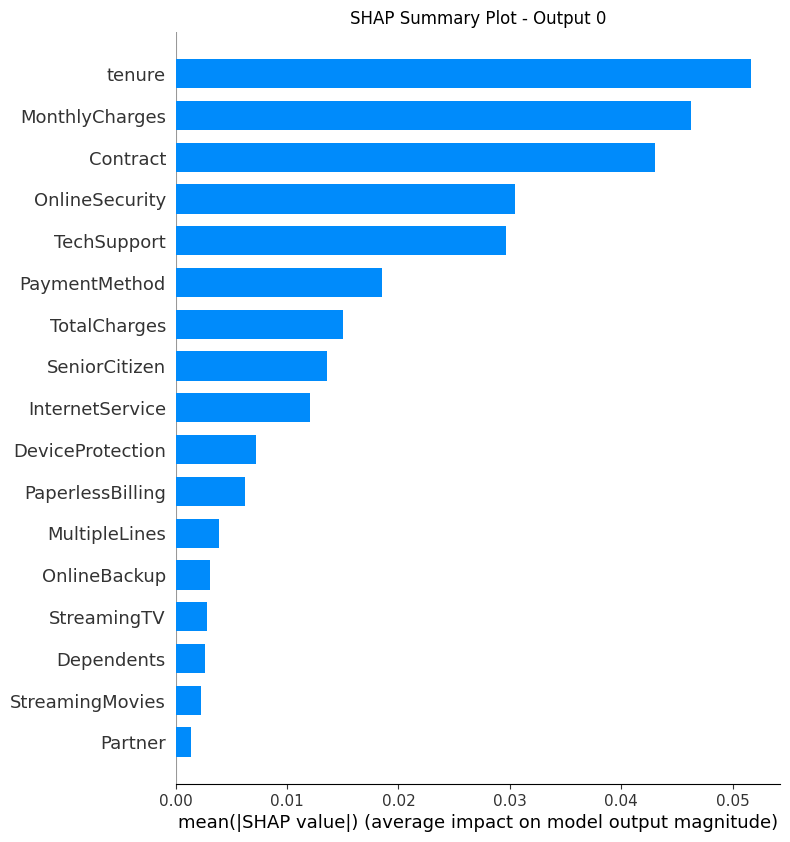

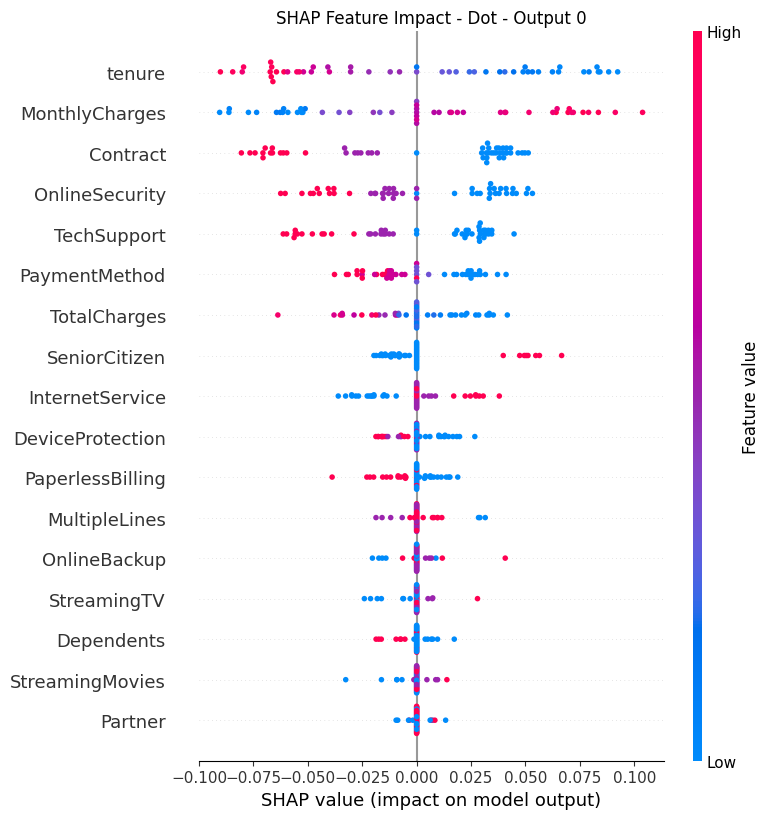

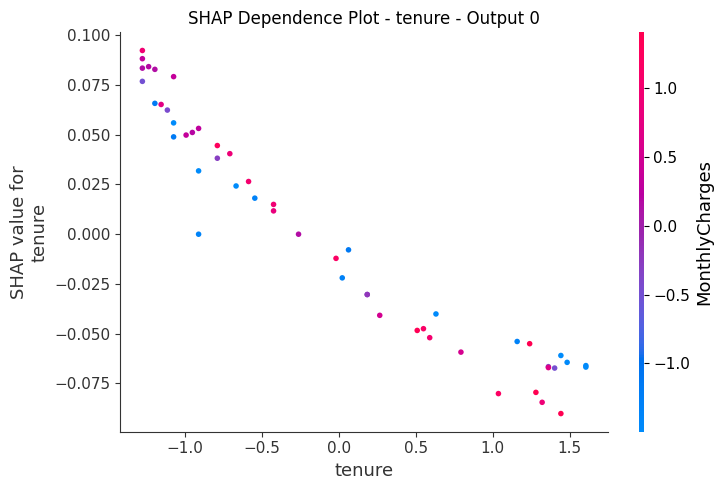

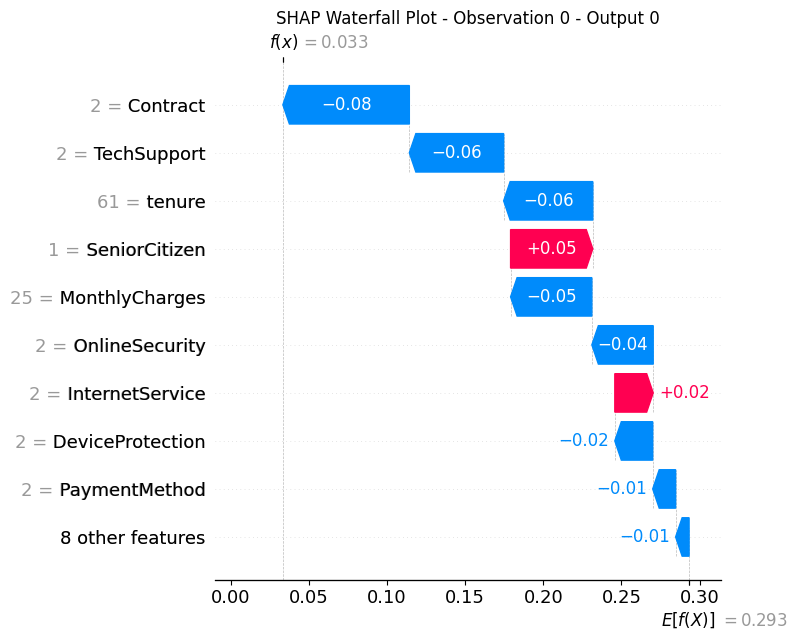

In [7]:
# Plot SHAP explanations
plot_shap(model_nn,'neural network', scaler, X_test, "tenure", 0)